# PCA and NMF

- transform data to lower dimension
- reverse the transformation to go to original dimension
- Visualize the transformed image
- Find the performance for different number of components [23, 10, 5, 3, 1]

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [9]:
df = pd.read_csv('data_number_nine.csv')
df.shape

(23, 23)

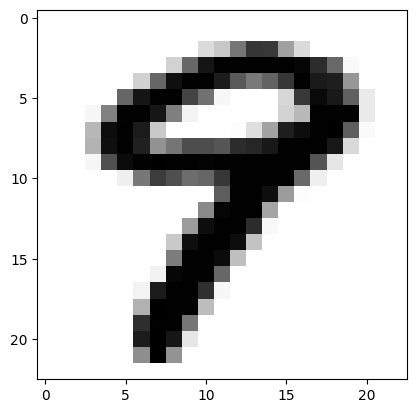

In [10]:
def ShowMe(X):
    Y = 1-X
    plt.imshow(Y, cmap='gray')
    plt.show()

X = np.array(df)
ShowMe(X)

(23, 20) (23, 23)
Explained Variance (20 components): 1.00


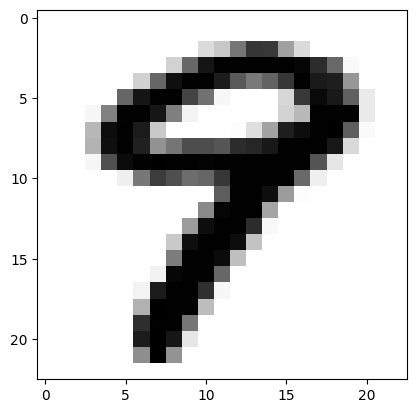

(23, 10) (23, 23)
Explained Variance (10 components): 0.99


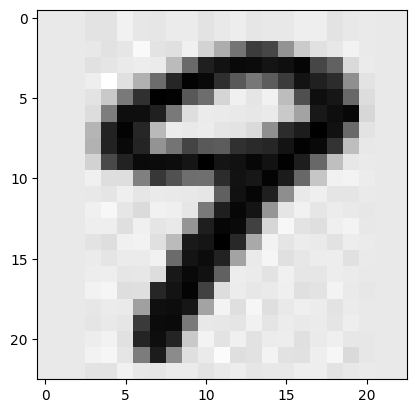

(23, 5) (23, 23)
Explained Variance (5 components): 0.94


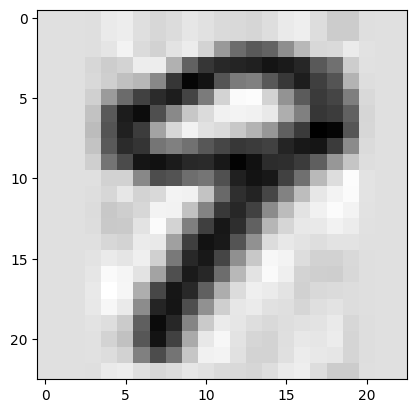

(23, 3) (23, 23)
Explained Variance (3 components): 0.82


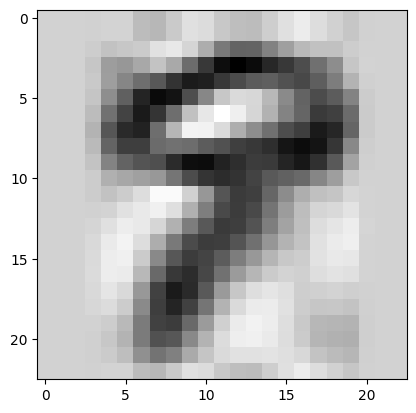

(23, 1) (23, 23)
Explained Variance (1 components): 0.37


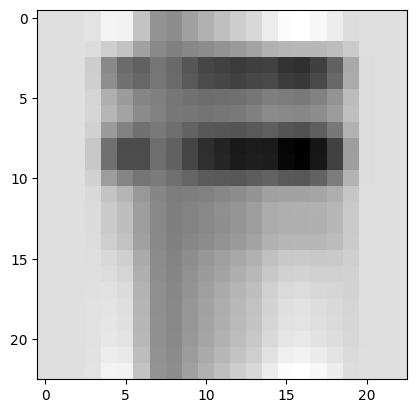

In [11]:
from sklearn.decomposition import PCA

n_components_list = [20, 10, 5, 3, 1]
transformed_images = []

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X)

    X_reconstructed = pca.inverse_transform(X_transformed)
    transformed_images.append(X_reconstructed)
    print(X_transformed.shape, X_reconstructed.shape)
    
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Explained Variance ({n_components} components): {explained_variance:.2f}")

    ShowMe(X_reconstructed.reshape(X.shape))

## NMF

Relative Reconstruction Error (20 components): 0.01


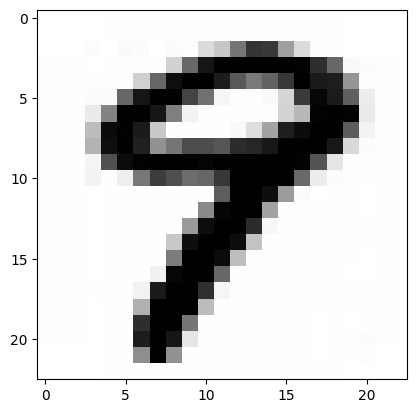

Relative Reconstruction Error (10 components): 0.09


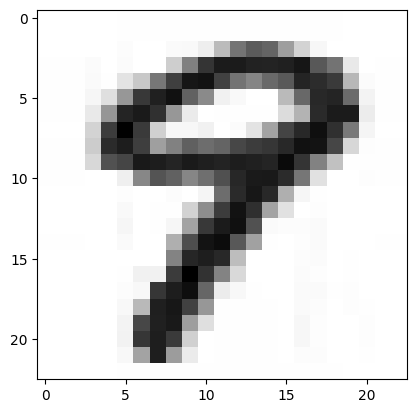

Relative Reconstruction Error (5 components): 0.22


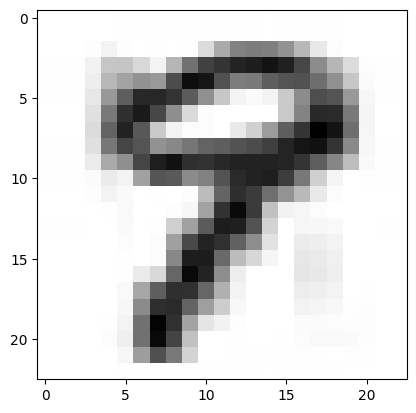

Relative Reconstruction Error (3 components): 0.36


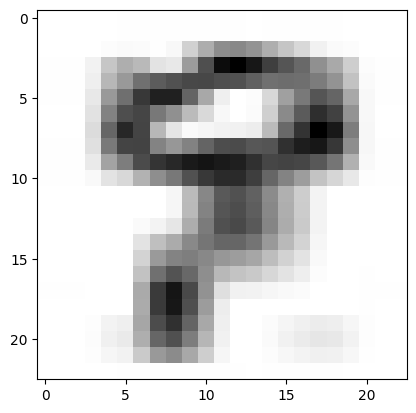

Relative Reconstruction Error (1 components): 0.63


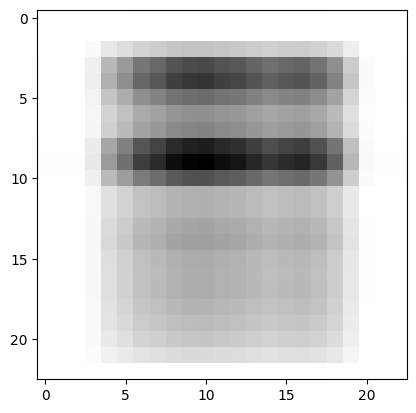

In [13]:
from sklearn.decomposition import NMF

transformed_images_nmf = []

for n_components in n_components_list:
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    W = nmf.fit_transform(X)
    H = nmf.components_

    X_reconstructed_nmf = np.dot(W, H)
    transformed_images_nmf.append(X_reconstructed_nmf)
    
    # Calculate reconstruction error
    reconstruction_error = np.linalg.norm(X - X_reconstructed_nmf, ord='fro')
    total_norm = np.linalg.norm(X, ord='fro')
    relative_error = reconstruction_error / total_norm
    print(f"Relative Reconstruction Error ({n_components} components): {relative_error:.2f}")

    ShowMe(X_reconstructed_nmf.reshape(X.shape))
